<a href="https://colab.research.google.com/github/Park323/AIC4010-AICapstone1/blob/main/yolov5_pistols_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

__Load the model and data__

In [ ]:
# Load Dataset from Roboflow
%mkdir dataset
%cd dataset
!curl -L "https://public.roboflow.com/ds/j8hfujlqjC?key=hc0ytPIUJR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# Load YOLO v5 Model from github
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

# Install packages for YOLO v5
%cd /content/yolov5/
! pip install -r requirements.txt

In [ ]:
%cd /
from glob import glob

# Load path of images on list
img_list = glob('/content/dataset/export/images/*.jpg')

print(len(img_list))

/
2971


__Train / Test split__

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=1422)

# Save the path of train/test images on text files
with open('content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list)+'\n')
with open('content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list)+'\n')

print(len(train_img_list), len(val_img_list))

2376 595


__Set the path of data in .yaml__

In [ ]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pistol']

In [ ]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['pistol']}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 1, 'names': ['pistol']}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [ ]:
%cat /content/dataset/data.yaml

names:
- pistol
nc: 1
train: /content/dataset/train.txt
val: /content/dataset/val.txt


## Train

How to train? : https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [ ]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=gun_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-455-g59aae85 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

__Check the result__

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

In [ ]:
from IPython.display import Image
import os

val_img_path = val_img_list[0]

In [ ]:
%%time
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/dataset/export/images/armas (1346)_jpg.rf.55466eca6eda54d716cc4a857ca353d3.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-455-g59aae85 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/dataset/export/images/armas (1346)_jpg.rf.55466eca6eda54d716cc4a857ca353d3.jpg: 416x416 1 pistol, Done. (0.009s)
Speed: 0.3ms pre-process, 9.1ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2
CPU times: user 43 ms, sys: 14.2 ms, total: 57.2 ms
Wa

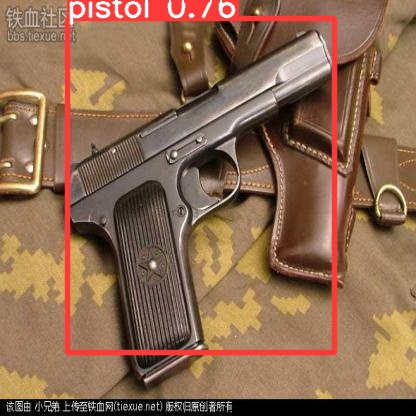

In [ ]:
Image('/content/yolov5/runs/detect/exp/armas (1346)_jpg.rf.55466eca6eda54d716cc4a857ca353d3.jpg')